In [23]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
import zipfile
with zipfile.ZipFile("archive (5).zip", 'r') as z:
    z.extractall()
    print(z.namelist())

['insurance.csv']


In [7]:
df=pd.read_csv('insurance.csv')
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [9]:
df.shape

(1338, 8)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,index,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


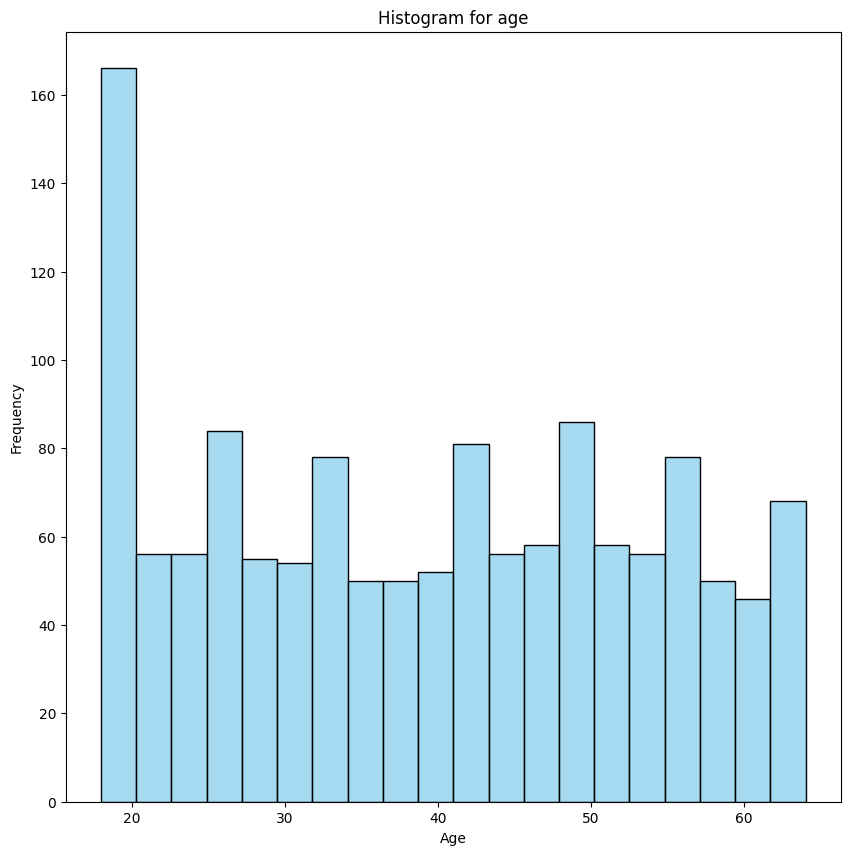

In [12]:
plt.figure(figsize=(10,10))
sns.histplot(df['age'], bins=20,color='skyblue')
plt.title('Histogram for age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [13]:
df.value_counts('smoker')

smoker
no     1064
yes     274
Name: count, dtype: int64

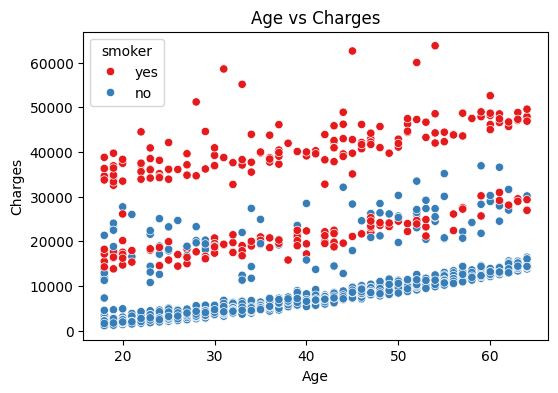

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker',palette='Set1')
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

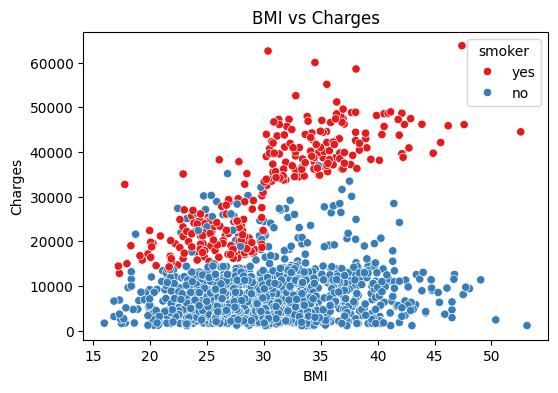

In [15]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker',palette='Set1')
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [16]:
top_charges=df.sort_values(by='charges', ascending=False).head(3)
print(top_charges[['age','sex','bmi','charges','smoker']])

      age     sex     bmi      charges smoker
543    54  female  47.410  63770.42801    yes
1300   45    male  30.360  62592.87309    yes
1230   52    male  34.485  60021.39897    yes


In [17]:
top_bmi=df.sort_values(by='bmi', ascending=False).head(3)
print(top_bmi[['age','sex','bmi','charges','smoker']])

      age   sex    bmi     charges smoker
1317   18  male  53.13   1163.4627     no
1047   22  male  52.58  44501.3982    yes
847    23  male  50.38   2438.0552     no


In [18]:
df_encoded=pd.get_dummies(df, columns=['sex','smoker','region'],drop_first=True)
df_encoded.head()

,index,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,19,27.900,0,16884.92400,False,True,False,False,True
1,1,18,33.770,1,1725.55230,True,False,False,True,False
2,2,28,33.000,3,4449.46200,True,False,False,True,False
3,3,33,22.705,0,21984.47061,True,False,True,False,False
4,4,32,28.880,0,3866.85520,True,False,True,False,False


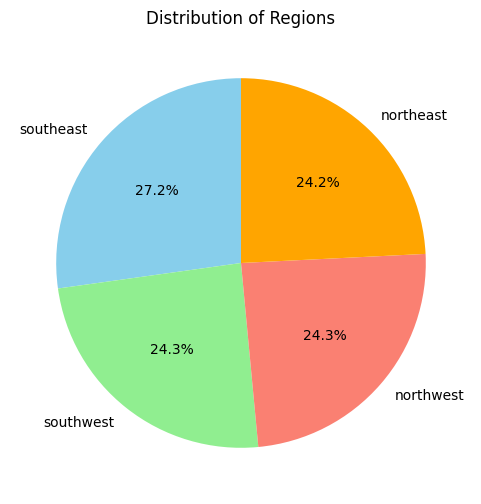

In [19]:
region_counts=df['region'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title('Distribution of Regions')
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['sex']=encoder.fit_transform(df['sex'])
df['smoker']=encoder.fit_transform(df['smoker'])
df['region']=encoder.fit_transform(df['region'])
df.head(3)

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.90,0,1,3,16884.9240
1,1,18,1,33.77,1,0,2,1725.5523
2,2,28,1,33.00,3,0,2,4449.4620


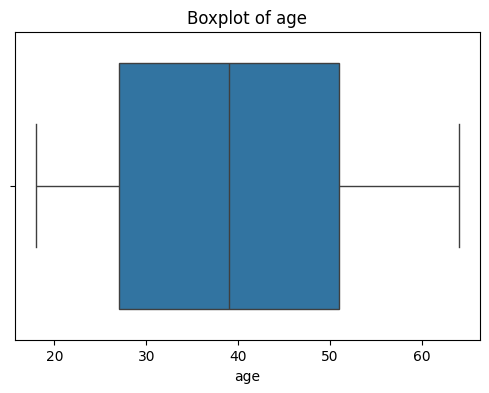

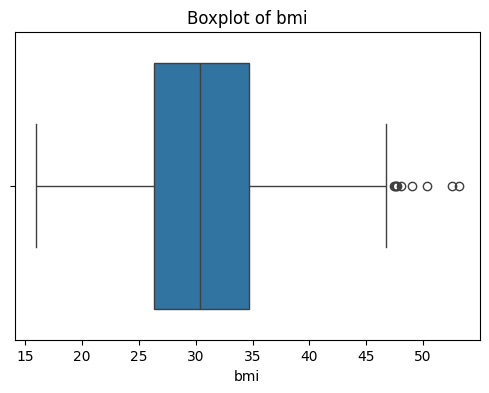

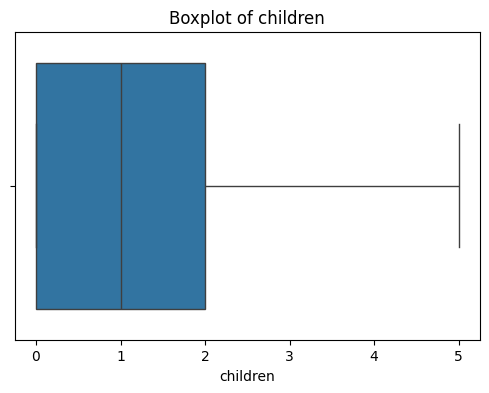

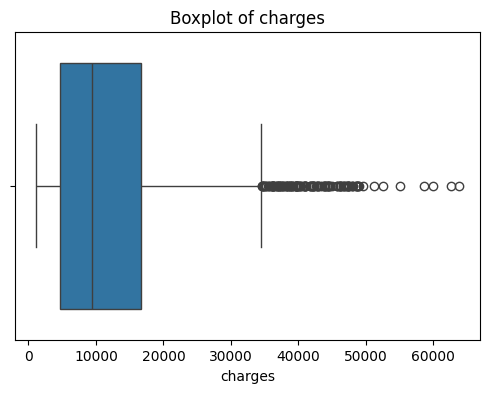

In [25]:
numeric_cols = ['age', 'bmi', 'children', 'charges']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [26]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Column: {col}, Number of outliers: {outliers.shape[0]}')
    print(outliers[[col]])

Column: age, Number of outliers: 0
Empty DataFrame
Columns: [age]
Index: []
Column: bmi, Number of outliers: 9
        bmi
116   49.06
286   48.07
401   47.52
543   47.41
847   50.38
860   47.60
1047  52.58
1088  47.74
1317  53.13
Column: children, Number of outliers: 0
Empty DataFrame
Columns: [children]
Index: []
Column: charges, Number of outliers: 139
          charges
14    39611.75770
19    36837.46700
23    37701.87680
29    38711.00000
30    35585.57600
...           ...
1300  62592.87309
1301  46718.16325
1303  37829.72420
1313  36397.57600
1323  43896.37630

[139 rows x 1 columns]


In [27]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(lower)
print(upper)
df['charges'] = df['charges'].apply(lambda x: upper if x > upper else (lower if x < lower else x))


-13109.1508975
34489.350562499996


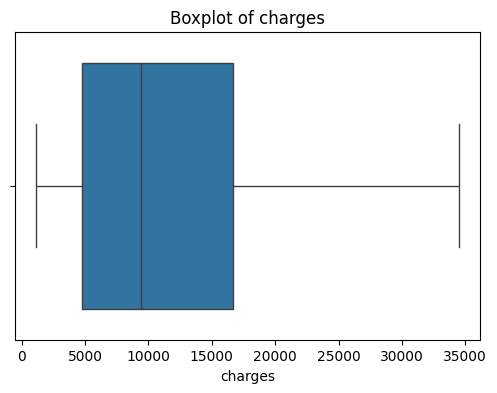

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['charges'])
plt.title('Boxplot of charges')
plt.show()

In [29]:
df.drop(columns=['index'], inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [30]:
correlation=df['bmi'].corr(df['charges'])
print(correlation)

0.16017498676251876


In [31]:
df.shape

(1338, 7)